# Graph.py

## Install requirements

create a virtual environment in current directory by 

```
python3 -m venv .env    # macos
python -m venv .env     # linux
```

In [7]:
%pip install prettytable
%pip install IPython

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Imports

In [8]:
from IPython.display import Image
from prettytable import PrettyTable

## Utilities

In [9]:
def getNode(name, l):
    return next((i for i in l if i.name == name), -1)

## Classes

In [10]:

class Node:

    def __init__(self, name, x=None, y=None):
        self.parent = None
        self.name = name
        self.edges = []
        self.value = float('inf')  # cost reaching this node


class Edge:

    def __init__(self, edge):
        self.start = edge[0]
        self.end = edge[1]
        self.value = edge[2]


class Graph:

    def __init__(self, node_list, edges):
        self.nodes = []
        for name in node_list:
            self.nodes.append(Node(name))

        for e in edges:
            e = (getNode(e[0], self.nodes), getNode(e[1], self.nodes), e[2])

            self.nodes[next((i for i, v in enumerate(self.nodes) if v.name == e[0].name), -1)].edges.append(Edge(e))
            self.nodes[next((i for i, v in enumerate(self.nodes) if v.name == e[1].name), -1)].edges.append(
                Edge((e[1], e[0], e[2])))

    def print(self):
        node_list = self.nodes

        t = PrettyTable(['  '] + [i.name for i in node_list])
        for node in node_list:
            edge_values = ['X'] * len(node_list)
            for edge in node.edges:
                edge_values[next((i for i, e in enumerate(node_list) if e.name == edge.end.name), -1)] = edge.value
            t.add_row([node.name] + edge_values)
        print(t)


class Queue:
    def __init__(self, type, sort_by = ''):
        self.type = type
        self.items = []
        self.sort_by = sort_by

    def empty(self):
        return len(self.items) == 0

    def push(self, element):
        self.items.append(element)
        '''
        queue = [element_0, element_1, ... , element_n] <- element_n+1
        '''
        if self.type == 'PRIO':
            '''
            Sorting so lowest cost/ value is at [0]
            queue = [element_0 < element_1 < ... < element_n < element_n+1]
            '''
            if self.sort_by == '':
                self.items.sort(key=lambda item: item.value)
            elif self.sort_by == 'f':
                self.items.sort(key=lambda item: item.f)

    def pop(self):
        if not self.empty():
            if self.type == 'LIFO':
                ''' LIFO
                queue = [element_0, elemente_1, ... , element_n]
                                                            -> pop element_n
                '''
                return self.items.pop()
            else:
                ''' FIFO & PRIO
                queue = [element_0, element_1, ... , element_n]
                            -> pop element_0
                '''
                return self.items.pop(0)
        return None

## Implementation of search algorithms

In [11]:
def traverse(graph, frontier, start_node_name, target_node_name):
    explored = []
    path = []

    # node
    start_node = getNode(start_node_name, graph.nodes)
    start_node.value = 0

    target_node = getNode(target_node_name, graph.nodes)

    frontier.push(start_node)

    while not frontier.empty():
        current_node = frontier.pop()

        if not current_node == target_node:
            explored.append(current_node.name)

            for edge in current_node.edges:
                child = edge.end
                new_cost = current_node.value + edge.value

                if not explored.__contains__(child.name):
                    child.parent = current_node
                    child.value = new_cost
                    frontier.push(child)

                # UCS-only, updating the value and parent of node in the queue
                elif frontier.type == 'PRIO' and new_cost < child.value:
                    for node in frontier.items:
                        if node.name == child.name:
                            node.value = new_cost
                            node.parent = current_node
                            frontier.items.sort(key=lambda item: item.value)
                            break

        else:
            path.append(current_node.name)
            while not current_node == start_node:
                current_node = current_node.parent
                path.insert(0, current_node.name)
            break

    if len(path) == 0:
        print('zwischen ' + start_node_name + ' und ' + target_node_name + ' konnte kein Pfad gefunden werden')
    else:
        print('From ' + start_node_name + ' to ' + target_node_name + ': ')
        print('Path: ' + path.__str__().format())
        print('Cost: ' + target_node.value.__str__())


def bfs(graph, start_node_name, target_node_name):
    traverse(graph, Queue('FIFO'), start_node_name, target_node_name)


def dfs(graph, start_node_name, target_node_name):
    traverse(graph, Queue('LIFO'), start_node_name, target_node_name)


def ucs(graph, start_node_name, target_node_name):
    traverse(graph, Queue('PRIO'), start_node_name, target_node_name)


## Main

In [12]:
# directed and weighted digraph
romania = Graph(['Or', 'Ne', 'Ze', 'Ia', 'Ar', 'Si', 'Fa',
                 'Va', 'Ri', 'Ti', 'Lu', 'Pi', 'Ur', 'Hi',
                 'Me', 'Bu', 'Dr', 'Ef', 'Cr', 'Gi'],
                [
                    ('Or', 'Ze', 71), ('Or', 'Si', 151),
                    ('Ne', 'Ia', 87), ('Ze', 'Ar', 75),
                    ('Ia', 'Va', 92), ('Ar', 'Si', 140),
                    ('Ar', 'Ti', 118), ('Si', 'Fa', 99),
                    ('Si', 'Ri', 80), ('Fa', 'Bu', 211),
                    ('Va', 'Ur', 142), ('Ri', 'Pi', 97),
                    ('Ri', 'Cr', 146), ('Ti', 'Lu', 111),
                    ('Lu', 'Me', 70), ('Me', 'Dr', 75),
                    ('Dr', 'Cr', 120), ('Cr', 'Pi', 138),
                    ('Pi', 'Bu', 101), ('Bu', 'Gi', 90),
                    ('Bu', 'Ur', 85), ('Ur', 'Hi', 98),
                    ('Hi', 'Ef', 86)
                ])


def main():
    # Task 1
    print("UCS")
    graph = romania
    ucs(graph, 'Ti', 'Bu')

    print("\nBFS")
    graph = romania
    bfs(graph, 'Ti', 'Bu')

    print("\nDFS")
    graph = romania
    dfs(graph, 'Ti', 'Bu')

main()

UCS
From Ti to Bu: 
Path: ['Ti', 'Ar', 'Si', 'Ri', 'Pi', 'Bu']
Cost: 536

BFS
From Ti to Bu: 
Path: ['Ti', 'Ar', 'Si', 'Fa', 'Bu']
Cost: 568

DFS
From Ti to Bu: 
Path: ['Ti', 'Lu', 'Me', 'Dr', 'Cr', 'Pi', 'Bu']
Cost: 615


![Bildschirmfoto 2025-05-09 um 13.15.02.png](<attachment:Bildschirmfoto 2025-05-09 um 13.15.02.png>)
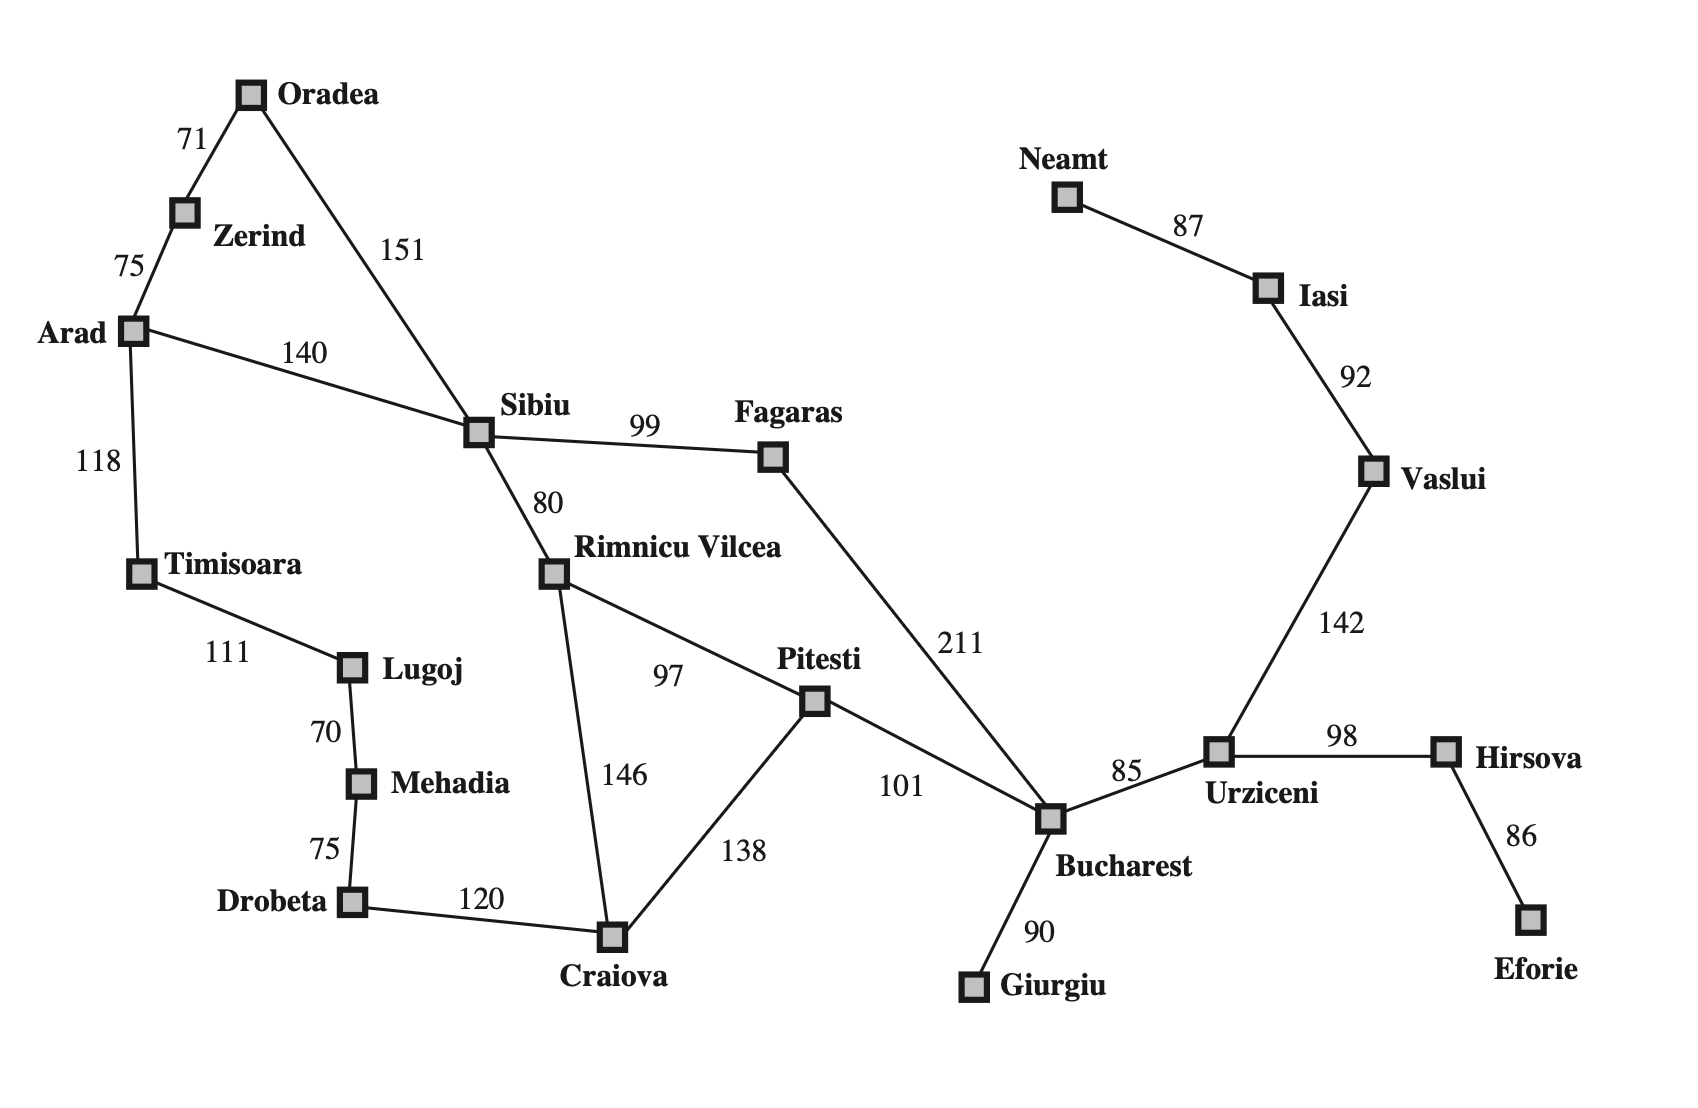